Project Title: Predicting Weight Loss Outcomes Based on Patient Characteristics (age and initial weight) and Drug Intervention (Semaglutide)

In [31]:
import pandas as pd 

file = pd.read_csv('step4.csv')

Trial results pulled from following URL:

https://clinicaltrials.gov/study/NCT03548987?intr=Semaglutide&aggFilters=phase:3,results:with&term=Obesity&page=2&rank=12&tab=results
https://clinicaltrials.gov/study/NCT03693430?intr=Semaglutide&aggFilters=phase:3,results:with&term=Obesity&rank=7&tab=results
https://clinicaltrials.gov/study/NCT04074161?intr=Semaglutide&aggFilters=phase:3,results:with&term=Obesity&rank=5&tab=results 

Novo Nordisk step 4 trial extrapolation:



- not taking into account ethnicity or race
- ignored sex 
- assumed initial starting weight and std 


Gender breakdown: 

429 female
106 male


maintenance period weeks 20 -68
535 (504 completed)

mean age: 47, 12 STD



secondary measure: 

change in body weight in kg 

520 participants (semaglutide 2.4mg)

-7.5 kg mean (7.6 std)



change in patient BMI

520 participants

-2.7 mean (2.7 std)


Data extrapolation: 

In [32]:
import numpy as np
import pandas as pd


np.random.seed(42)

# Number of participants
n = 520

# Extrapolated ages using a normal distribution function to extrapolate data
mean_age = 47
std_age = 12
age = np.random.normal(mean_age, std_age, n)

# Extrapolated initial weights (based on a plausible weight range, adjust as needed)
mean_initial_weight = 95  
std_initial_weight = 15   
initial_weight = np.random.normal(mean_initial_weight, std_initial_weight, n)

# Extrapolated weight changes based on the given mean and std
mean_weight_change = -7.5  
std_weight_change = 7.6  
weight_change = np.random.normal(mean_weight_change, std_weight_change, n)

# Calculated final weight
final_weight = initial_weight + weight_change

# Made a DataFrame of data features
data = pd.DataFrame({
    'Age': age,
    'Initial_Weight': initial_weight,
    'Weight_Change': weight_change,
    'Final_Weight': final_weight
})

# Displayd the first few rows of the dataset
print(data.head())

# Saved the dataset to a CSV file
data.to_csv('wegovy_weight_loss_data.csv', index=False)


         Age  Initial_Weight  Weight_Change  Final_Weight
0  52.960570       69.958921       5.297850     75.256771
1  45.340828      103.150403     -10.987520     92.162882
2  54.772262       85.060644       0.697974     85.758618
3  65.276358      103.558980      -7.792664     95.766316
4  44.190160       83.551113      -8.811967     74.739145


Linear regression model 

In [33]:
from sklearn.model_selection import train_test_split

X = data[['Age', 'Initial_Weight']]  
y = data['Final_Weight']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [36]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [38]:
#model evaluation

print(lm.intercept_)

coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

-1.3331381068688302


,Coefficient
Age,-0.043503
Initial_Weight,0.962806


Text(0.5, 1.0, 'Predictions vs Test values')

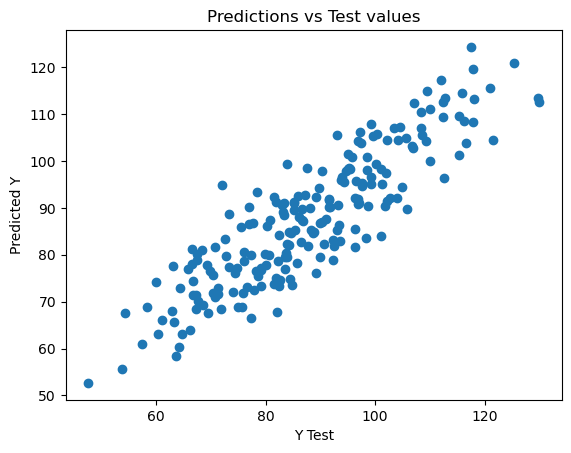

In [39]:
#predictions from our model 

predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title ('Predictions vs Test values')

MAE: 6.0732464564780875
MSE: 57.30218052683132
RMSE: 7.569820376127251


C:\Users\Kemokru\AppData\Local\Temp\ipykernel_7068\4226044195.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50)


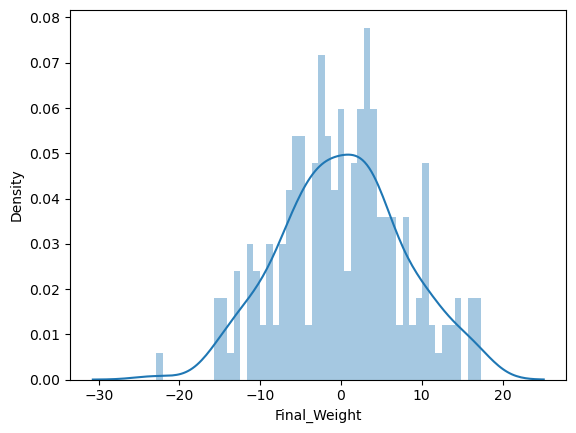

In [40]:
#residual histogram
from sklearn import metrics


sns.distplot((y_test-predictions),bins=50)




print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

above here the metric values are high for the model (MAE of 6.07)

Non-linear Models:

Weight loss might not have a purely linear relationship with age and initial weight. I will consider trying more advanced models such as 
Polynomial regression to introduce non-linear terms.